<a href="https://colab.research.google.com/github/byundonghwan/maching_learning_basic/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 시각화할때 화면에 어떤 사이즈로 보여줄건지.
plt.rcParams['figure.figsize'] = [5, 3]
sns.set(style = 'whitegrid') # seaborn 스타일
sns.set_palette('pastel') # seaborn 테마
warnings.filterwarnings('ignore')

In [2]:
# 한글이 깨지는 경우 방지.
from matplotlib import font_manager, rc
import matplotlib 
import platform

if platform.system() == 'Windows':
  # 윈도우 경우 폰트 사용.
  font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf')
  rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# 데이터셋 불러오기 'Tips' from seaborn
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.shape

(244, 7)

In [5]:
# matplotlib을 활용한 시각화. 
sum_tip_by_day = tips.groupby('day')['tip'].sum()
sum_tip_by_day

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [6]:
x_label = ['Thu', 'Fri', 'Sat', 'Sun']
x_label_index = np.arange(len(x_label))
x_label_index

array([0, 1, 2, 3])

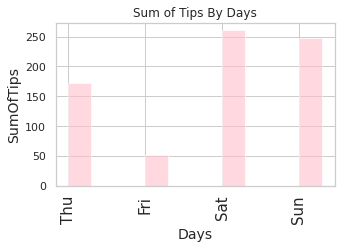

In [7]:
# Bar 차트 이해 및 제작.
plt.bar(x_label, sum_tip_by_day, color = 'pink',
        alpha = 0.6, # 색 투명도 
        width = 0.3, # 너비
        align = 'edge' # 배치
        )
plt.title('Sum of Tips By Days')
plt.xlabel('Days', fontsize = 14)
plt.ylabel('SumOfTips', fontsize = 14)
plt.xticks(x_label_index, x_label, rotation = 90, fontsize = 15)
plt.show() 

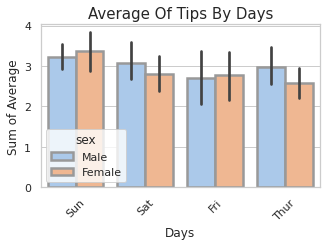

In [8]:
# seaborn을 활용한 시각화
sns.barplot(data = tips , #데이터 프레임 명시.
            x = 'day',
            y = 'tip',
            estimator = np.average,
            hue = 'sex' ,# 색깔 구분으로 특정 컬럼값을 비교.
            order = ['Sun', 'Sat', 'Fri', 'Thur'], # x tick 순서.
            edgecolor = '.6', # 모서리 색상 지정. 
            linewidth= 2.5 # 모서리 굵기 지정.
            )
plt.title('Average Of Tips By Days', fontsize = 15)
plt.xlabel('Days')
plt.ylabel('Sum of Average')
plt.xticks(rotation = 45)
plt.show()

In [9]:
# Pie 차트 이해 및 제작.
sum_tip_by_day = tips.groupby('day')['tip'].sum()
ratio_tip_by_day = sum_tip_by_day / sum_tip_by_day.sum()
ratio_tip_by_day

day
Thur    0.234875
Fri     0.071024
Sat     0.355942
Sun     0.338159
Name: tip, dtype: float64

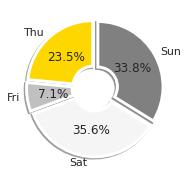

In [10]:
x_label = ['Thu', 'Fri', 'Sat', 'Sun']

plt.pie(ratio_tip_by_day, # 비율값
        labels = x_label, # 라벨값
        autopct = '%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수 2자리까지 표시)
        startangle=90,  # 축이 시작되는 각도 설정
        counterclock=True, # True : 시계방향 순, False : 반시계방향
        explode=[0.05, 0.05, 0.05, 0.05], # 중심에서 벗어나는 정도 표시
        shadow = True, # 그림자 표시 여부
        colors=['gold', 'silver','whitesmoke', 'gray'],
        wedgeprops = {'width':0.7, 'edgecolor': 'w', 'linewidth': 3}) # 도넛 차트를 그릴때 사용.
plt.show()

In [11]:
# Line 차트 이해 및 제작.
# line 차트 예제를 위해, tips 데이터에 가상 시간 컬럼 추가.
# 일요일 데이터만 사용.
sun_tips = tips[tips['day'] == 'Sun']
sun_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
# 현재 서버 시간을 얻기 위해 datetime 라이브러리 사용
import datetime

# datetime.date.today() 오늘 날짜 표시
date = []
today = datetime.date.today()
date.append(today)

for time in range(sun_tips.shape[0] - 1):
  today += datetime.timedelta(1) # 하루씩 추가.
  date.append(today)
date

[datetime.date(2023, 2, 21),
 datetime.date(2023, 2, 22),
 datetime.date(2023, 2, 23),
 datetime.date(2023, 2, 24),
 datetime.date(2023, 2, 25),
 datetime.date(2023, 2, 26),
 datetime.date(2023, 2, 27),
 datetime.date(2023, 2, 28),
 datetime.date(2023, 3, 1),
 datetime.date(2023, 3, 2),
 datetime.date(2023, 3, 3),
 datetime.date(2023, 3, 4),
 datetime.date(2023, 3, 5),
 datetime.date(2023, 3, 6),
 datetime.date(2023, 3, 7),
 datetime.date(2023, 3, 8),
 datetime.date(2023, 3, 9),
 datetime.date(2023, 3, 10),
 datetime.date(2023, 3, 11),
 datetime.date(2023, 3, 12),
 datetime.date(2023, 3, 13),
 datetime.date(2023, 3, 14),
 datetime.date(2023, 3, 15),
 datetime.date(2023, 3, 16),
 datetime.date(2023, 3, 17),
 datetime.date(2023, 3, 18),
 datetime.date(2023, 3, 19),
 datetime.date(2023, 3, 20),
 datetime.date(2023, 3, 21),
 datetime.date(2023, 3, 22),
 datetime.date(2023, 3, 23),
 datetime.date(2023, 3, 24),
 datetime.date(2023, 3, 25),
 datetime.date(2023, 3, 26),
 datetime.date(2023, 3,

In [13]:
sun_tips['date'] = date
sun_tips.head()

,total_bill,tip,sex,smoker,day,time,size,date
0,16.99,1.01,Female,No,Sun,Dinner,2,2023-02-21
1,10.34,1.66,Male,No,Sun,Dinner,3,2023-02-22
2,21.01,3.50,Male,No,Sun,Dinner,3,2023-02-23
3,23.68,3.31,Male,No,Sun,Dinner,2,2023-02-24
4,24.59,3.61,Female,No,Sun,Dinner,4,2023-02-25


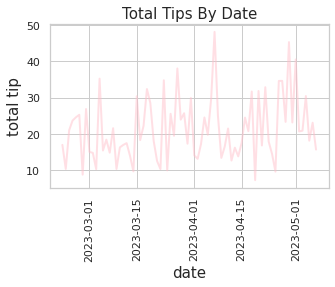

In [14]:
# matploblib 라인 차트 그리기
plt.plot(sun_tips['date'], sun_tips['total_bill'],
         linestyle ='-', # 라인 모양
         linewidth = 2, # 라인 두께
         color = 'pink', # 색상
         alpha = 0.5, # 투명도

         )
plt.title('Total Tips By Date', fontsize = 15)
plt.xlabel('date', fontsize = 15)
plt.ylabel('total tip', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

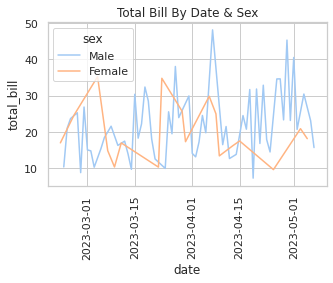

In [15]:
# seaborn을 활용한 시각화
sns.lineplot(data = sun_tips,
             x = 'date',
             y = 'total_bill',
             hue = 'sex',
             )
plt.title('Total Bill By Date & Sex')
plt.xticks(rotation = 90)
plt.show()

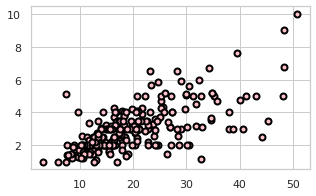

In [16]:
# Scatter 차트 이해 및 제작.=> 상관관계를 나타냄.

# matploblib을 이용한 시각화
plt.scatter(tips['total_bill'], tips['tip'],
            color = 'pink', # 색상
            edgecolor = 'black', # 테두리 색상
            linewidth = 2 # 라인 두께
            )
plt.show()

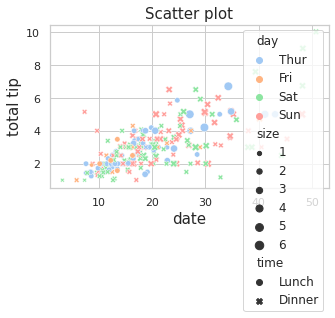

In [17]:
# seaborn 을 활용한 시각화
sns.scatterplot(data = tips,
                x = 'total_bill',
                y = 'tip',
                style = 'time', # 모양 구분으로 다른 변수 비교
                hue = 'day', # 색상 구분으로 다른 변수 비교
                size = 'size', # 크기 구분으로 다른 변수 비교
                )
plt.title('Scatter plot', fontsize = 15)
plt.xlabel('date', fontsize = 15)
plt.ylabel('total tip', fontsize = 15)
plt.show()

In [18]:
# Heap Map 차트 이해 및 제작.
tips.corr() # 연속한 변수의 상관관계

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


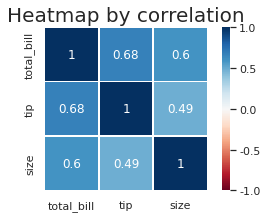

In [19]:
# seaborn을 활용한 시각화.
sns.heatmap(tips.corr(),
            annot = True, # 박스안 corr 값 표시 여부
            square = True, # 박스를 정사각형으로 표시 여부
            vmin = -1, vmax = 1, # 최소 최댓값 지정
            linewidth = .5, # 라인 두께 지정
            cmap = 'RdBu' # 색상 선택 
            )
plt.title('Heatmap by correlation', fontsize = 20)
plt.show()

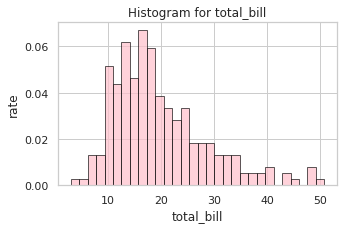

In [20]:
# Histogram 차트 이해 및 제작.
# matplotlib을 활용한 시각화.

plt.hist(tips['total_bill'],
         bins = 30,
         density = True,
         alpha = 0.7,
         color = 'pink',
         edgecolor = 'black',
         linewidth = 0.9)
plt.title('Histogram for total_bill')
plt.xlabel('total_bill')
plt.ylabel('rate')
plt.show()

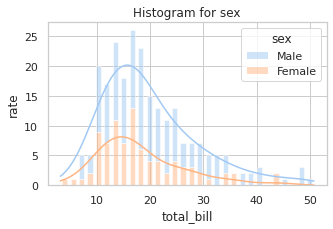

In [21]:
# seaborn을 활용한 시각화.

sns.histplot(data = tips,
             x = 'total_bill',
             bins = 30,
             kde = True,
             hue = 'sex',
             multiple = 'stack',
             shrink = 0.6)
plt.title('Histogram for sex')
plt.xlabel('total_bill')
plt.ylabel('rate')
plt.show()

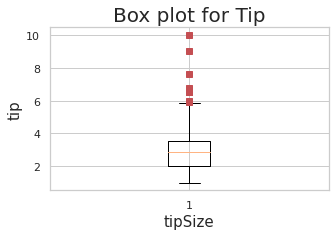

In [22]:
# Box 차트 이해 및 제작.

# matploblib을 활용한 시각화
plt.boxplot(tips['tip'],
            sym = 'rs',
            )
plt.title('Box plot for Tip', fontsize = 20)
plt.xlabel('tipSize', fontsize = 15)
plt.ylabel('tip', fontsize = 15)
plt.show()

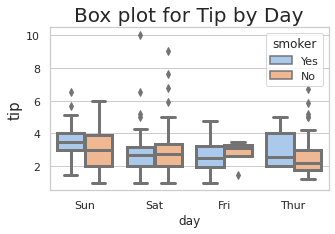

In [23]:
# seaborn을 활용한 시각화
sns.boxplot(data = tips,
            x = 'day',
            y = 'tip',
            hue = 'smoker',
            linewidth = 3,
            order = ['Sun','Sat', 'Fri', 'Thur'])
plt.title('Box plot for Tip by Day', fontsize = 20)
plt.ylabel('tip', fontsize = 15)
plt.show()